In [1383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder


In [1384]:
test=pd.read_csv(r"test.csv")
train=pd.read_csv(r"train.csv")

# Análisis de datos

In [1385]:
# Quitamos algunos valores extremos

#train.drop(train.index[[523, 1298]], axis=0, inplace=True)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [1386]:
saleprice_train = train["SalePrice"].copy()
ids_train = train["Id"].copy()
train_original = train.copy()

saleprice_train_log=np.log(train["SalePrice"]).copy()
train = train.drop(["Id", "SalePrice"], axis=1)


In [1387]:

ids_test = test["Id"].copy()

test = test.drop(["Id"], axis=1)

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Limpieza de datos

In [1388]:
# Ponemos los tipos de ordinario y nom correctamente

variables_ord = ["LotShape",
"Utilities",
"LandSlope",
"OverallQual",
"OverallCond",
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"Electrical",
"KitchenQual",
"Functional",
"FireplaceQu",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"PoolQC",
"Fence",
]

variables_nom=["MSSubClass",
"MSZoning",
"Street",
"Alley",
"LandContour",
"LotConfig",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"Foundation",
"Heating",
"CentralAir",
"GarageType",
"MiscFeature",
"MiscVal",
"SaleType",
"SaleCondition",
]

variables_cont=[
"LotFrontage",
"LotArea",
"MasVnrArea",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"LowQualFinSF",
"GrLivArea",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"MoSold"]

variables_disc=[
"YearBuilt",
"YearRemodAdd",
"BsmtFullBath",
"BsmtHalfBath",
"FullBath",
"HalfBath",
"Bedroom",
"Kitchen",
"TotRmsAbvGrd",
"Fireplaces",
"GarageYrBlt",
"GarageCars",
"YrSold",
]


In [1389]:
total_num = len(train_original["LotArea"])
Prop_nul= train_original.isnull().sum()/total_num
Prop_nul.sort_values(ascending=False) #Proporción de valores nulos en las variables
#Prop_nul["PoolQC"]

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


## Tiramos las columnas con muchos valores nulos

In [1390]:
train.dropna(thresh=0.4*total_num, axis=1, inplace=True) #Descartamos las columnas que tienen más del 30% de valores nulos
train_col_nn= variables_ord+variables_nom
train_col_n = list(set(train.columns) - set(train_col_nn))

variables_ord= list(set(variables_ord).intersection(set(train.columns)))
variables_nom= list(set(variables_nom).intersection(set(train.columns)))

for c in train.columns:
    if not (c in variables_ord + variables_nom):
        train[c].replace(np.nan,train[c].mean(), inplace=True)
        train[c].replace("nan",train[c].mean(), inplace=True)
        train[c].fillna(inplace=True, value=train[c].mean())
    else:
        train[c].replace(np.nan,train[c].mode().iloc[0], inplace=True)
        train[c].replace("nan",train[c].mode().iloc[0], inplace=True)
        train[c].fillna(inplace=True, value=train[c].mode())

train_col_n.sort()
train_col_n

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MoSold',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [1391]:
test_col_nn= variables_ord+variables_nom+['Alley', 'Fence', 'PoolQC', 'MiscFeature']
test_col_n = list(set(test.columns) - set(test_col_nn))



for c in test.columns:
    if (c in test_col_n):
        test[c].replace(np.nan,test[c].mean(), inplace=True)
        test[c].replace("nan",test[c].mean(), inplace=True)
        test[c].fillna(inplace=True, value=test[c].mean())
    else:
        test[c].replace(np.nan,test[c].mode().iloc[0], inplace=True)
        test[c].replace("nan",test[c].mode().iloc[0], inplace=True)
        test[c].fillna(inplace=True, value=test[c].mode())


## Reconvertimos las columnas categóricas nominales

In [1392]:
print(f"1. shape: {train.shape} cols: {train.columns[:1]}")
print(f"1. shape: {test.shape} cols: {test.columns[:1]}")

for col_name in variables_nom:
    # TRAIN
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(train[[col_name]])
    columns_names = [f"{col_name}_"+str(item) for item in oe_style.categories_[0]]
    #print(columns_names)
    df_to_add = pd.DataFrame(oe_results.toarray(), columns=columns_names)
    train = pd.concat([train, df_to_add], axis=1)
    train.drop([col_name], axis=1, inplace=True)

    #TEST
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(test[[col_name]])
    columns_names = [f"{col_name}_"+str(item) for item in oe_style.categories_[0]]
    #print(columns_names)
    df_to_add = pd.DataFrame(oe_results.toarray(), columns=columns_names)
    test = pd.concat([test, df_to_add], axis=1)
    test.drop([col_name], axis=1, inplace=True)



1. shape: (1460, 75) cols: Index(['MSSubClass'], dtype='object')
1. shape: (1459, 79) cols: Index(['MSSubClass'], dtype='object')


## Reconvertimos las columnas categóricas ordinales

In [1393]:

"""
We add/remove variables that could be missing from train to test or vice versa:
print(f"shape: {train.shape} cols: {train.columns[1:]}")
print(f"shape: {test.shape} cols: {test.columns[1:]}")
print(f"train num: {len(train.columns)} test num: {len(test.columns)}")
train_m_test = [c for c in train.columns if not c in test.columns]
test_m_train = [c for c in test.columns if not c in train.columns]

test.drop(test_m_train, axis=1, inplace=True)
for col_missing_name in train_m_test:
    test[col_missing_name] = 0 # Add column filled wit zeros


print(f"in train but not in test: {train_m_test}")
print(f"in test but not in train: {test_m_train}")
"""
scale_mapper = {
  "LotShape": {
    "Reg": 0,
    "IR1": 1,
    "IR2": 2,
    "IR3": 3
  },
  "Utilities": {
    "AllPub": 0,
    "NoSewr": -1,
    "NoSeWa": -2,
    "ELO": -3
  },
  "LandSlope": {
    "Gtl": 0,
    "Mod": 1,
    "Sev": 2
  },
  "OverallQual": {
    "1": -4,
    "2": -3,
    "3": -2,
    "4": -1,
    "5": 0,
    "6": 1,
    "7": 2,
    "8": 3,
    "9": 4,
    "10": 5
  },
  "OverallCond": {
    "1": -4,
    "2": -3,
    "3": -2,
    "4": -1,
    "5": 0,
    "6": 1,
    "7": 2,
    "8": 3,
    "9": 4,
    "10": 5
  },
  "ExterQual": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2
  },
  "ExterCond": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2
  },
  "BsmtQual": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2,
    "NA": -3
  },
  "BsmtCond": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2,
    "NA": -3
  },
  "BsmtExposure": {
    "Gd": 2,
    "Av": 1,
    "Mn": 0,
    "No": -1,
    "NA": -2
  },
  "BsmtFinType1": {
    "GLQ": 3,
    "ALQ": 2,
    "BLQ": 1,
    "Rec": 0,
    "LwQ": -1,
    "Unf": -2,
    "NA": -3
  },
  "BsmtFinType2": {
    "GLQ": 3,
    "ALQ": 2,
    "BLQ": 1,
    "Rec": 0,
    "LwQ": -1,
    "Unf": -2,
    "NA": -3
  },
  "HeatingQC": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2
  },
  "Electrical": {
    "SBrkr": 0,
    "FuseA": -1,
    "FuseF": -2,
    "FuseP": -3,
    "Mix": -2.5
  },
  "KitchenQual": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2
  },
  "Functional": {
    "Typ": 0,
    "Min1": -1,
    "Min2": -2,
    "Mod": -3,
    "Maj1": -4,
    "Maj2": -5,
    "Sev": -6,
    "Sal": -7
  },
  "FireplaceQu": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2,
    "NA": -3
  },
  "GarageFinish": {
    "Fin": 2,
    "RFn": 1,
    "Unf": 0,
    "NA": -1
  },
  "GarageQual": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2,
    "NA": -3
  },
  "GarageCond": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "Po": -2,
    "NA": -3
  },
  "PavedDrive": {
    "Y": 2,
    "P": 1,
    "N": 0
  },
  "PoolQC": {
    "Ex": 2,
    "Gd": 1,
    "TA": 0,
    "Fa": -1,
    "NA": -2
  },
  "Fence": {
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
  }
}


for nombre in variables_ord:
    train[nombre] = train[nombre].replace(scale_mapper[nombre])
    test[nombre] = test[nombre].replace(scale_mapper[nombre])

In [1394]:
print(f"shape: {train.shape} cols: {train.columns}")
print(f"shape: {test.shape} cols: {test.columns}")

shape: (1460, 243) cols: Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=243)
shape: (1459, 240) cols: Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=240)


In [1395]:
print(f"shape: {test.shape} cols: {test.columns}")


shape: (1459, 240) cols: Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=240)


In [1396]:
list(set(train.columns) - set(test.columns))

['MiscVal_1150',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'Heating_OthW',
 'MiscVal_1400',
 'MiscVal_1300',
 'MiscVal_15500',
 'MiscVal_560',
 'MiscVal_480',
 'RoofMatl_Roll',
 'Condition2_RRAn',
 'MiscVal_620',
 'MiscVal_3500',
 'MiscVal_8300',
 'RoofMatl_ClyTile',
 'Heating_Floor',
 'Condition2_RRAe',
 'MiscVal_54',
 'MiscVal_800',
 'HouseStyle_2.5Fin',
 'Exterior1st_Stone',
 'MiscVal_350',
 'Condition2_RRNn']

In [1397]:
train[train.select_dtypes(include=[np.object_]).columns]

""
0
1
2
3
4
...
1455
1456
1457
1458


OverallQual ExterQual : 0.73
OverallQual SalePrice : 0.82 < ADD
ExterQual SalePrice : 0.68 < REMOVE
OverallQual has 0.00% proportion of NaN in the original dataset
ExterQual has 0.00% proportion of NaN in the original dataset
------------------------------------------------ 

OverallQual BsmtQual : 0.67
OverallQual SalePrice : 0.82 < ADD
BsmtQual SalePrice : 0.66 < REMOVE
OverallQual has 0.00% proportion of NaN in the original dataset
BsmtQual has 2.53% proportion of NaN in the original dataset
------------------------------------------------ 

OverallQual KitchenQual : 0.67
OverallQual SalePrice : 0.82 < ADD
KitchenQual SalePrice : 0.67 < REMOVE
OverallQual has 0.00% proportion of NaN in the original dataset
KitchenQual has 0.00% proportion of NaN in the original dataset
------------------------------------------------ 

OverallQual GarageCars : 0.60
OverallQual SalePrice : 0.82 < ADD
GarageCars SalePrice : 0.68 < REMOVE
OverallQual has 0.00% proportion of NaN in the original dataset


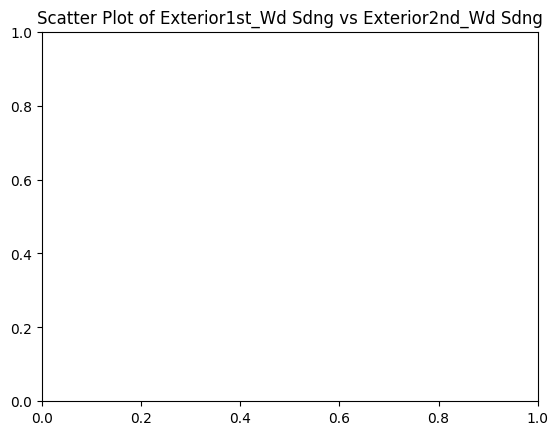

In [1398]:
CorrMatrix = train.corr()
CorrMatrixT = CorrMatrix.where(np.triu(np.ones(CorrMatrix.shape), k=1).astype(bool))

row_indices, col_indices = np.where(CorrMatrixT > 0.6)
to_remove = []
for i, j in zip(row_indices, col_indices):

    row_name = CorrMatrixT.iloc[i, :].name #row
    col_name = CorrMatrixT.iloc[:, j].name #col
    corr_val = CorrMatrixT.iloc[i, j] #corr value

    corr_with_sp1 = saleprice_train_log.corr(train[row_name])
    corr_with_sp2 = saleprice_train_log.corr(train[col_name])

    if abs(corr_with_sp1) > abs(corr_with_sp2):
       select1 = "< ADD"
    else:
        select1 = "< REMOVE"
        to_remove.append(row_name)

    if abs(corr_with_sp2) > abs(corr_with_sp1):
       select2 = "< ADD"
    else:
        select2 = "< REMOVE"
        to_remove.append(col_name)

    #df = pd.concat([train[row_name], train[col_name]], axis=1)
    #sns.scatterplot(data=df, x=row_name, y=col_name)
    # Customize the plot if needed
    plt.title(f'Scatter Plot of {row_name} vs {col_name}')
    #plt.show()

    print(f"{row_name} {col_name} : {corr_val:.2f}")
    print(f"{row_name} SalePrice : {corr_with_sp1:.2f} {select1}")
    print(f"{col_name} SalePrice : {corr_with_sp2:.2f} {select2}")

    row_null_prop = Prop_nul[row_name[:row_name.index("_")]]*100 if ("_" in row_name) else Prop_nul[row_name]*100
    col_null_prop = Prop_nul[col_name[:col_name.index("_")]]*100 if ("_" in col_name) else Prop_nul[col_name]*100
    print(f"{row_name} has {row_null_prop:.2f}% proportion of NaN in the original dataset")
    print(f"{col_name} has {col_null_prop:.2f}% proportion of NaN in the original dataset")
    print("------------------------------------------------ \n")

print("RESULTS: ")
print(to_remove)


In [1399]:
# We'll drop tthe following variables

to_drop = to_remove
train.drop(columns=to_drop, axis=1, inplace=True)

In [1400]:
# Quitamos algunos valores extremos

indices = [523, 1298, 463-1, 633-1, 1325-1, 31-1, 1454-1, 971-1, 969-1]

train.drop(train.index[indices], axis=0, inplace=True)
saleprice_train_log.drop(saleprice_train_log.index[indices], axis=0, inplace=True)
ids_train.drop(ids_train.index[indices], axis=0, inplace=True)

# Modelos de Regresión lineal 

## Predicción 1r Modelo: Modelo tal cual

In [1401]:
lr = LinearRegression(fit_intercept=True)
X=train[list(set(train.columns).intersection(test.columns))]
Yreal_train=saleprice_train_log
lr1 = lr.fit(X,Yreal_train)
Ypred_train = lr1.predict(X)

print("score:", lr1.score(X,Yreal_train))
print("SHAPES")
print(f"X: {X.shape}, Yreal_train: {Yreal_train.shape}, Ypred_train {Ypred_train.shape}")

sub= Yreal_train - Ypred_train
result = np.column_stack((Yreal_train, Ypred_train, sub))
df_r_train_log = pd.DataFrame(result, columns=("Real (log)","Prediction (log) (train)", "Diference (log)"))

sub= np.exp(Yreal_train) - np.exp(Ypred_train)
result = np.column_stack((np.exp(Yreal_train), np.exp(Ypred_train), sub))
df_r_train = pd.DataFrame(result, columns=("Real","Prediction (train)", "Diference"))

pd.concat([df_r_train_log, df_r_train], axis=1)

score: 0.9438409298452545
SHAPES
X: (1451, 171), Yreal_train: (1451,), Ypred_train (1451,)


,Real (log),Prediction (log) (train),Diference (log),Real,Prediction (train),Diference
0,12.247694,12.202387,4.530709e-02,208500.0,199264.272573,9.235727e+03
1,12.109011,12.207456,-9.844508e-02,181500.0,200276.865283,-1.877687e+04
2,12.317167,12.237056,8.011080e-02,223500.0,206293.644819,1.720636e+04
3,11.849398,12.031434,-1.820366e-01,140000.0,167952.129498,-2.795213e+04
4,12.429216,12.508426,-7.920934e-02,250000.0,270607.724947,-2.060772e+04
...,...,...,...,...,...,...
1446,12.072541,12.061111,1.142994e-02,175000.0,173011.148586,1.988851e+03
1447,12.254863,12.310023,-5.516068e-02,210000.0,221909.182405,-1.190918e+04
1448,12.493130,12.493130,-1.206146e-12,266500.0,266500.000000,-3.214227e-07
1449,11.864462,11.837512,2.695056e-02,142125.0,138345.806640,3.779193e+03


In [1402]:
X_test=test[list(set(X.columns).intersection(test.columns))]

Ypred_test = lr1.predict(X_test)

#Ypred_test = model.predict(X_test)

print("SHAPES")
print(f"X: {X.shape}, Yreal_train: {Yreal_train.shape}, Ypred_train {Ypred_train.shape}")


Ypred_test
result = np.column_stack([ids_test, np.exp(Ypred_test)])
rdf = pd.DataFrame(result, columns=("Id","SalePrice"))
rdf['Id'] = rdf['Id'].astype(int)
rdf.to_csv('out_simple.csv', index=False) 

SHAPES
X: (1451, 171), Yreal_train: (1451,), Ypred_train (1451,)


## Predicción 2do Modelo: Sin variables nominales

In [1403]:
all_but_ord = list(set(X.columns) & (set(variables_ord) | set(variables_cont) | set(variables_disc)))
X = X[all_but_ord]

model = sm.OLS(Yreal_train, X).fit()
pvalues = model.pvalues

while True:
    model = sm.OLS(Yreal_train, X).fit()
    pvalues = model.pvalues
    max_pvalue = pvalues.max()

    if max_pvalue > 0.1:
        worst_feature = pvalues.idxmax()  # Get the feature with the worst p-value
        print(f"Droping: {worst_feature} with p-value {pvalues[worst_feature]}")
        X.drop(worst_feature, axis=1, inplace=True)  # Remove the feature from X
        test.drop(worst_feature, axis=1, inplace=True)
    else:
        break

print(f"X has shape of {X.shape}")

Droping: FireplaceQu with p-value 0.9601138322474916
Droping: MoSold with p-value 0.7914944063282437
Droping: PoolArea with p-value 0.7302616938420916
Droping: BsmtFinType2 with p-value 0.5257343300040938
Droping: BsmtUnfSF with p-value 0.49621620946691025
Droping: LandSlope with p-value 0.33181284995642757
Droping: BsmtHalfBath with p-value 0.2915012284531079
Droping: 3SsnPorch with p-value 0.24238706901380044
Droping: Utilities with p-value 0.21522490269056668
Droping: MasVnrArea with p-value 0.10908213566899065
X has shape of (1451, 24)


In [1404]:
X_test=test[list(set(X.columns).intersection(test.columns))]

Ypred_test = model.predict(X_test)

print("SHAPES")
print(f"X: {X.shape}, Yreal_train: {Yreal_train.shape}, Ypred_train {Ypred_train.shape}")


Ypred_test
result = np.column_stack([ids_test, np.exp(Ypred_test)])
rdf = pd.DataFrame(result, columns=("Id","SalePrice"))
rdf['Id'] = rdf['Id'].astype(int)
rdf.to_csv('out_no_nom.csv', index=False) 

SHAPES
X: (1451, 24), Yreal_train: (1451,), Ypred_train (1451,)


In [1405]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.137e+05
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                        0.00
Time:                        01:23:22   Log-Likelihood:                          907.47
No. Observations:                1451   AIC:                                     -1767.
Df Residuals:                    1427   BIC:                                     -1640.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
OverallCond       0.0246      0.004      6.975      0.000       0.018       0.032
Functional        0.0362      0.005      6.707      0.000       0.026       0.047
LotShape          0.0217      0.006      3.372      0.001       0.009       0.034
YrSold            0.0052   1.62e-05    320.117      0.000       0.005       0.005
GarageFinish      0.0356      0.005      6.492      0.000       0.025       0.046
OverallQual       0.0981      0.004     24.555      0.000       0.090       0.106
LotFrontage       0.0009      0.000      4.879      0.000       0.001       0.001
WoodDeckSF        0.0001   3.01e-05      3.456      0.001    4.49e-05       0.000
EnclosedPorch    -0.0001   5.97e-05     -2.167      0.030      -0.000   -1.23e-05
LowQualFinSF     -0.0004    7.3e-05     -4.940      0.000      -0.001      -0.000
BsmtFinSF1     8.807e-05    9.5e-06      9.268      0.000    6.94e-05       0.000
GrLivArea         0.0003   9.75e-06     27.040      0.000       0.000       0.000
OpenPorchSF       0.0001   5.64e-05      2.431      0.015    2.65e-05       0.000
Electrical        0.0358      0.010      3.662      0.000       0.017       0.055
PavedDrive        0.0538      0.008      7.057      0.000       0.039       0.069
Fireplaces        0.0222      0.006      3.455      0.001       0.010       0.035
LotArea        1.797e-06   3.95e-07      4.550      0.000    1.02e-06    2.57e-06
ExterCond        -0.0292      0.011     -2.682      0.007      -0.051      -0.008
BsmtCond          0.0468      0.013      3.682      0.000       0.022       0.072
BsmtExposure      0.0161      0.004      4.276      0.000       0.009       0.023
GarageQual        0.0400      0.015      2.709      0.007       0.011       0.069
HeatingQC         0.0429      0.004     10.258      0.000       0.035       0.051
ScreenPorch       0.0002   6.39e-05      2.541      0.011     3.7e-05       0.000
TotalBsmtSF       0.0001   1.14e-05     11.931      0.000       0.000       0.000
==============================================================================
Omnibus:                      188.101   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.030
Skew:                          -0.669   Prob(JB):                    6.02e-120
Kurtosis:                       5.700   Cond. No.                     6.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.3e+04. This might indicate that there are
strong multicollineari

## Miramos los gráficos de residuos

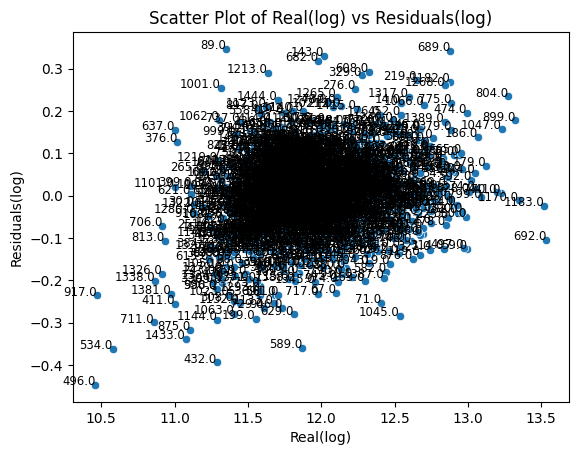

In [1406]:
sub= Yreal_train - Ypred_train
result = np.column_stack(([ids_train, Yreal_train, sub]))
df_prueba = pd.DataFrame(result, columns=(["Id", "Real(log)","Residuals(log)"]))
sns.scatterplot(data=df_prueba, x="Real(log)", y="Residuals(log)")
# Customize the plot if needed

# Add labels to data points
for line in range(0, df_prueba.shape[0]):
    plt.text(df_prueba['Real(log)'].iloc[line], df_prueba['Residuals(log)'].iloc[line], df_prueba['Id'].iloc[line],
        horizontalalignment='right', size='small', color='black')


plt.title(f'Scatter Plot of Real(log) vs Residuals(log)')
plt.show()

In [1407]:
for col_name in []:
    hue_column = train[col_name]
    result = np.column_stack((ids_train, Yreal_train, sub, hue_column))
    df_prueba = pd.DataFrame(result, columns=(["Id", "Real(log)","Residuals(log)", col_name]))
    sns.scatterplot(data=df_prueba, x="Real(log)", y="Residuals(log)", hue=col_name,size=0.9)

    plt.title(f'Scatter Plot of Real(log) vs Residuals(log)')
    plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

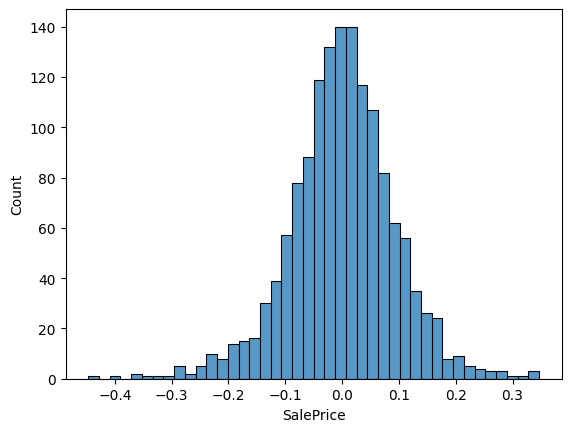

In [1408]:

# Add labels to the bars

cols = np.column_stack((ids_train, sub))
df_prueba = pd.DataFrame(cols, columns=("Id", "Residuals(log)"))

sns.histplot(data=sub)

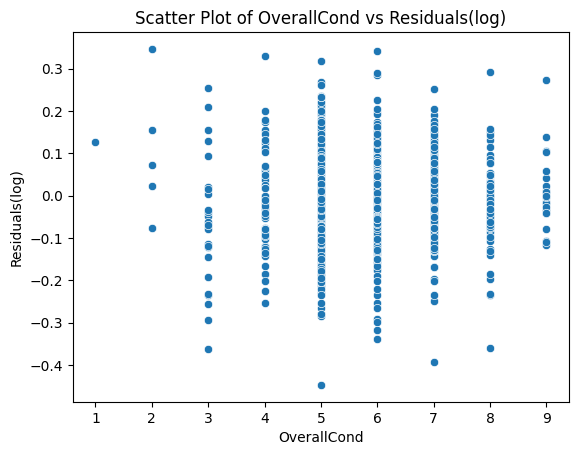

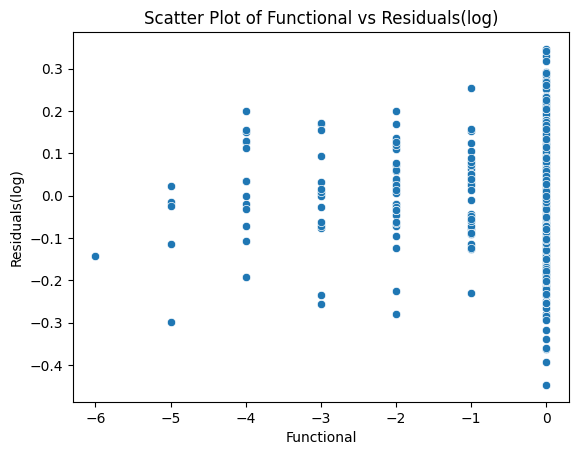

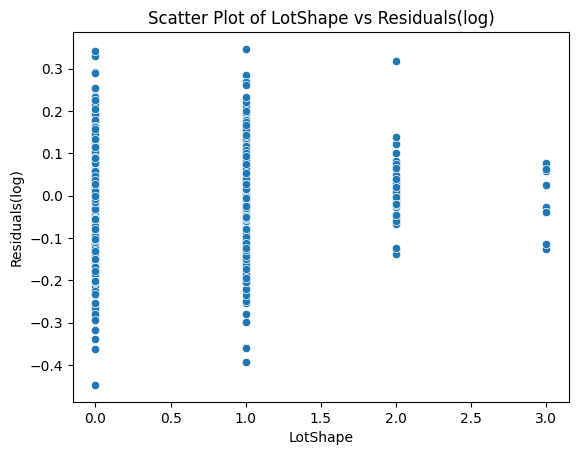

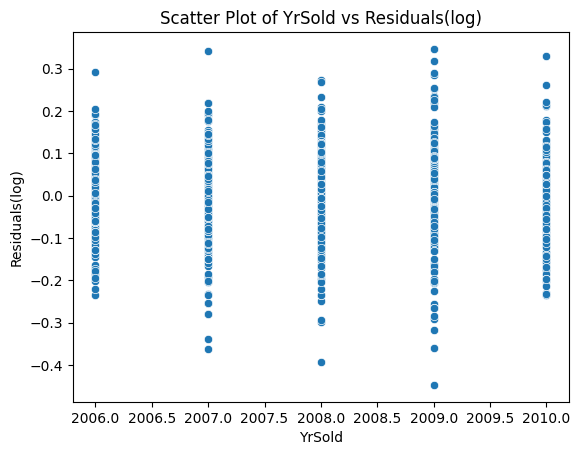

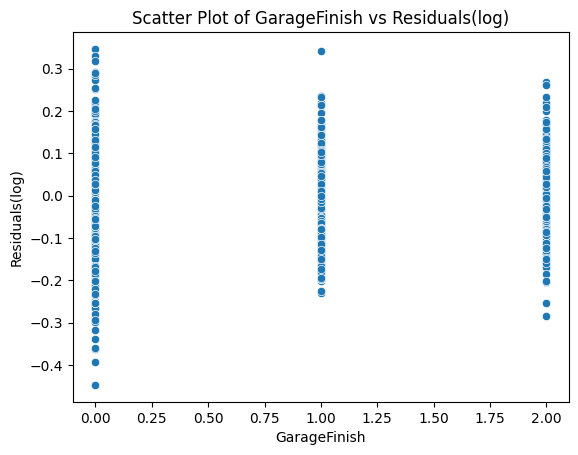

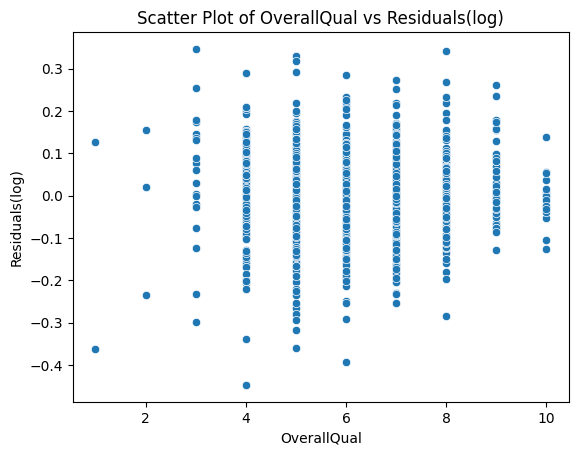

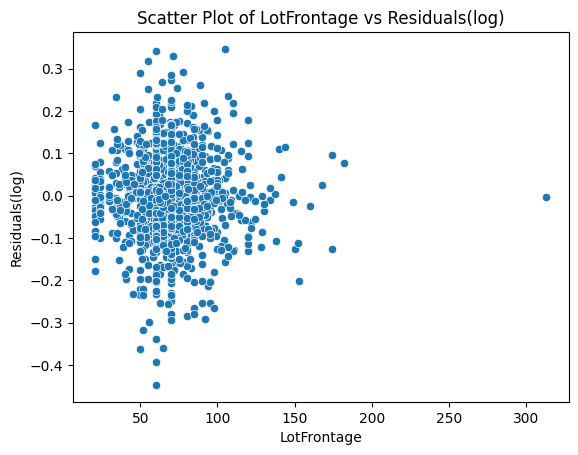

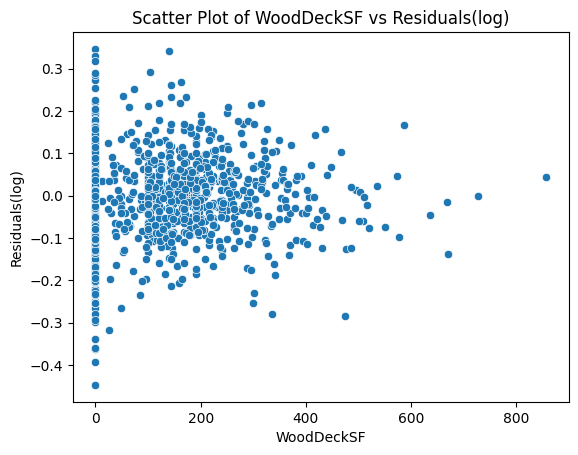

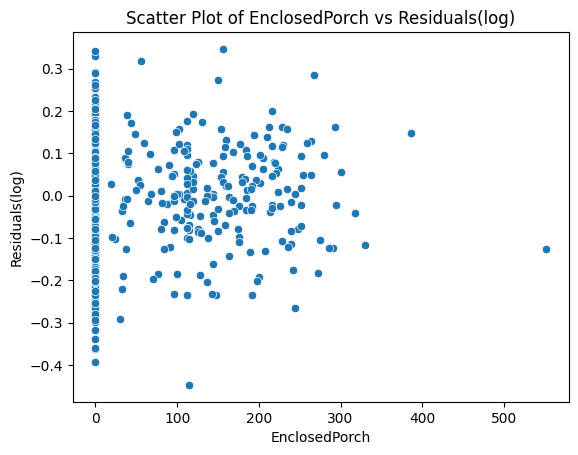

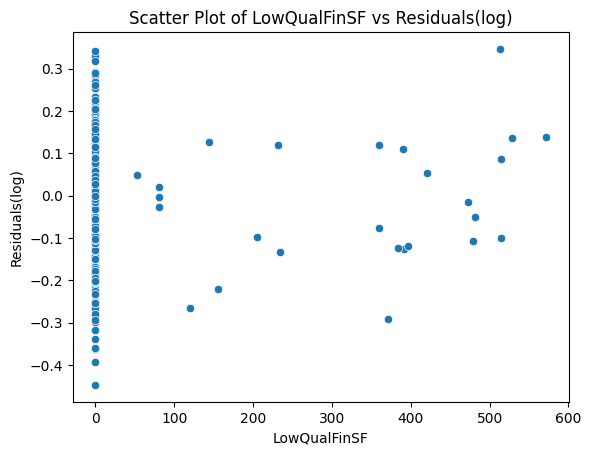

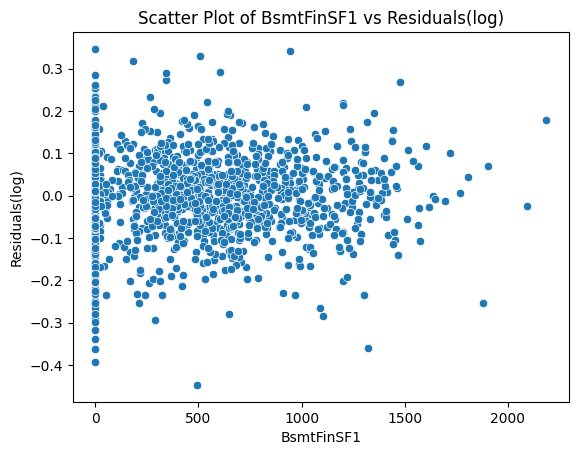

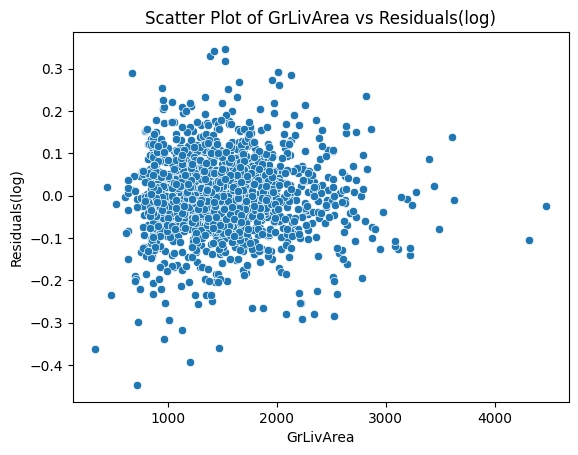

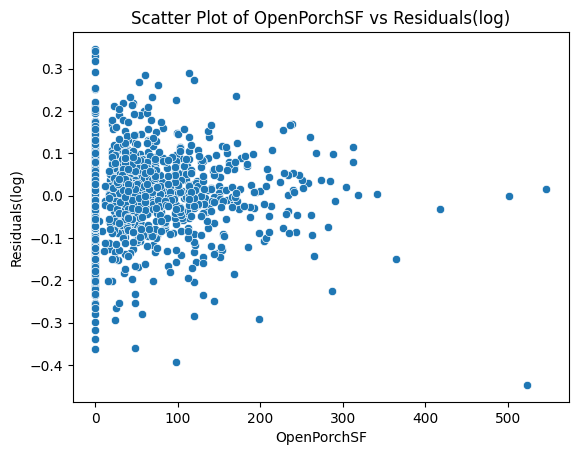

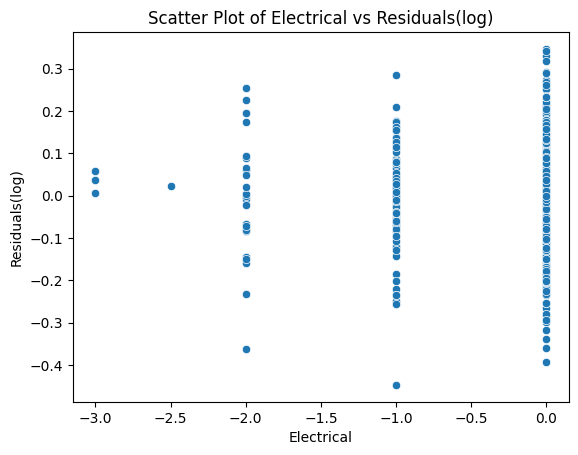

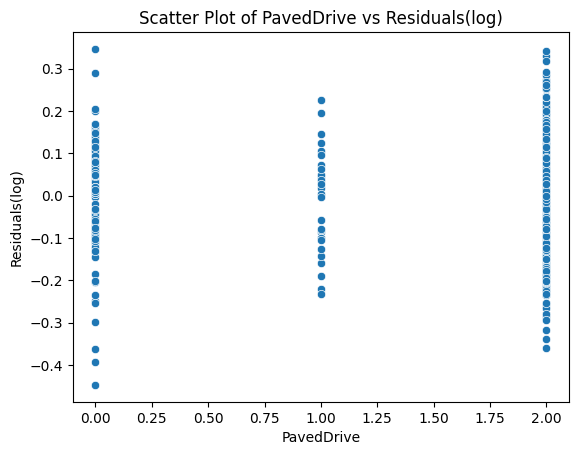

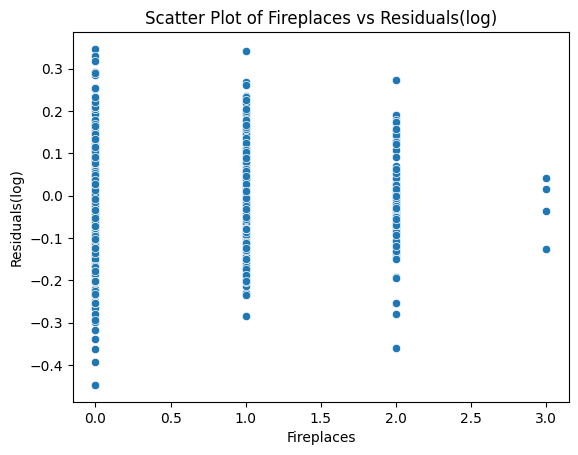

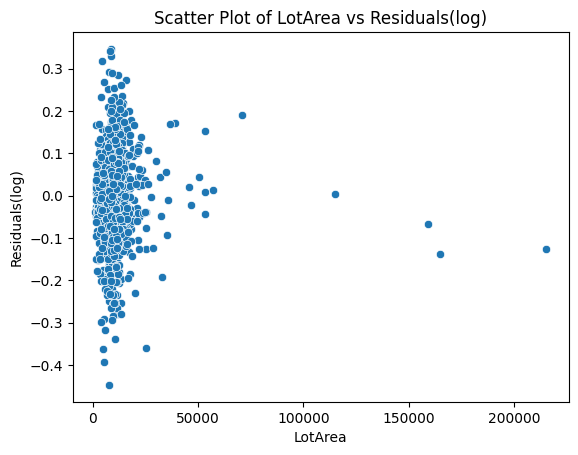

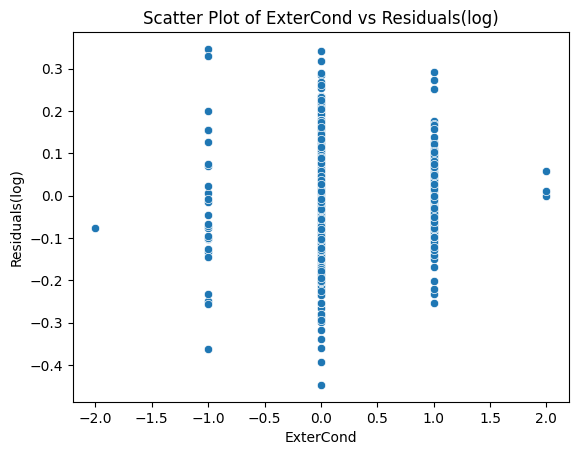

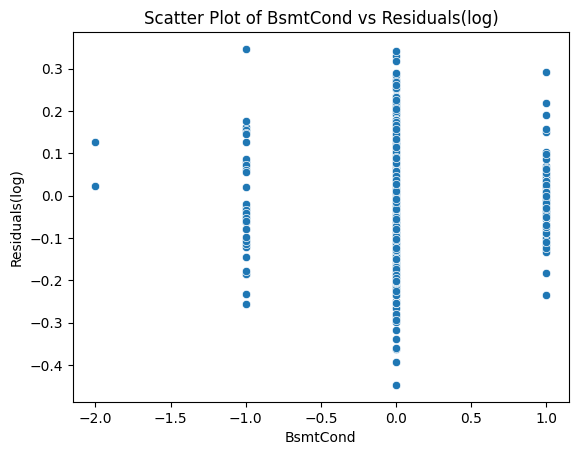

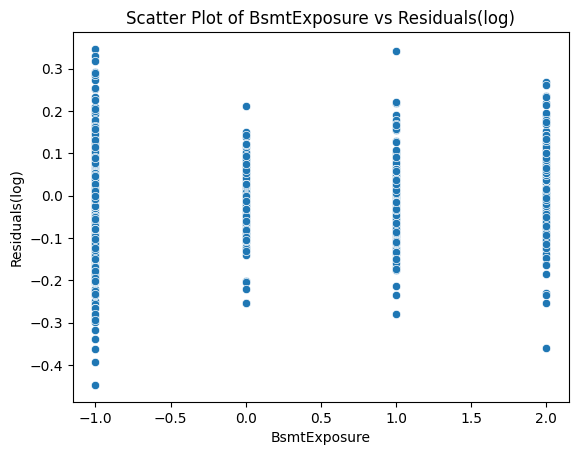

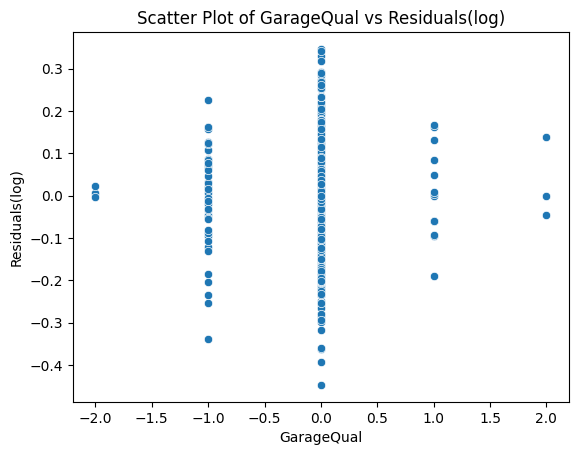

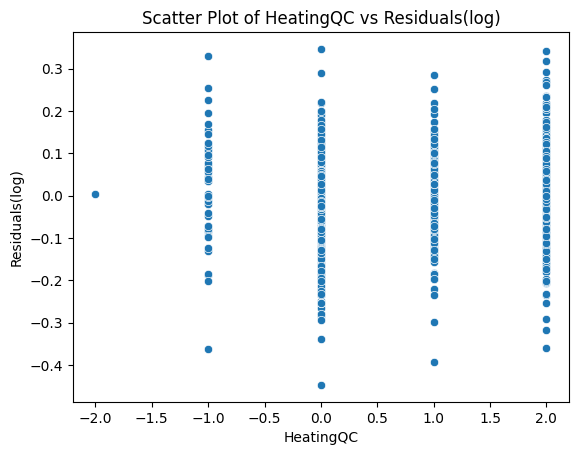

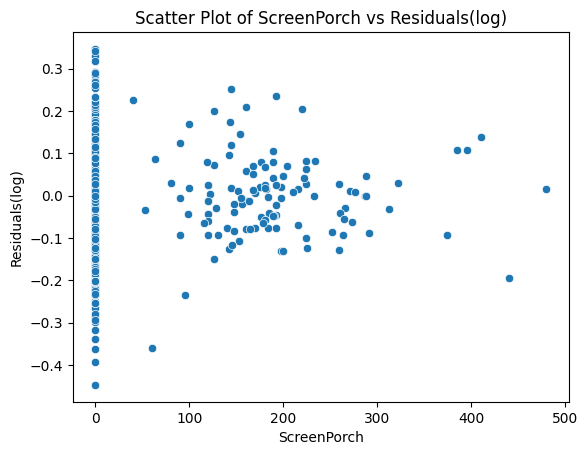

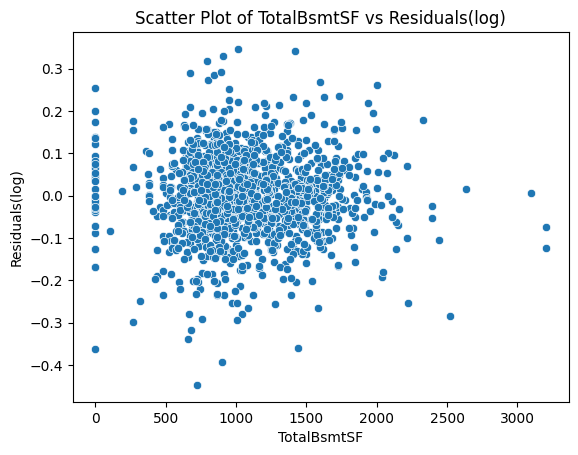

In [1409]:
for c in X.columns:
    result = np.column_stack((X[c][:-1], sub[:-1]))
    df_prueba = pd.DataFrame(result, columns=(f"{c}","Residuals(log)"))
    sns.scatterplot(data=df_prueba, x=c, y="Residuals(log)")
    # Customize the plot if needed
    plt.title(f'Scatter Plot of {c} vs Residuals(log)')
    #plt.show()

## Predicción 3er Modelo: solo variables nominales